# Business Problem

### In recent year City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough besiness advice to address this problem.

### The analysis of hotel booking cancelltions as well as other factors that have no bearing on their besiness and yearly revenues generation are the main topic of this report

## Assumptions

#### 1. No anusual occurrrnces between 2015 and 2017 will have a substantial impact on the data used.
#### 2. The infomation is still current and a can be used to analyze a hotel's possible in an efficient manner.
#### 3. There are no unanticipated negatives to the hotel employing any advised technique.
#### 4. The hotels are not currently using any of the suggested solution.
#### 5. The biggest factor effecting the effectiveness of earning income is booking cancellation.
#### 6. Cancellation result in vacalt in vacant rooms for the booking length of time.
#### 7. Clients make hotel reservations the same year they make cancellationa.

# Research Question

#### 1. What are the variables that affect hotel reservation cancellations?
#### 2. How will we make hotel reservations cancellations better?
#### 3. How will hotels be assisted in making pricing and promotional decisions?

# Hypothesis

#### 1. More cancellations occur when prices are higher.
#### 2. When there is a longer waiting list customers tend to cancel mor frequently.
#### 3. The majority of clients are coming from offline travel agents to make their reservations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("hotel_bookings.csv")

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 32)

We can see that there are 119390 instances and 32 attributes in the data set.

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [9]:
df["reservation_status_date"].dtype

dtype('<M8[ns]')

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.drop(["company","agent"], axis=1, inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
df.shape

(118898, 30)

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

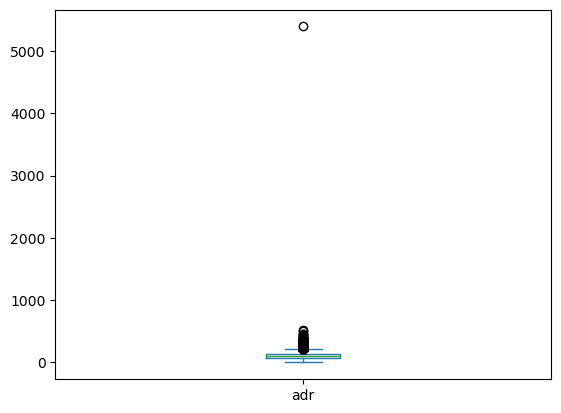

In [20]:
df['adr'].plot(kind="box") ## check the outlier

In [21]:
df=df[df['adr']<5000]

<Axes: >

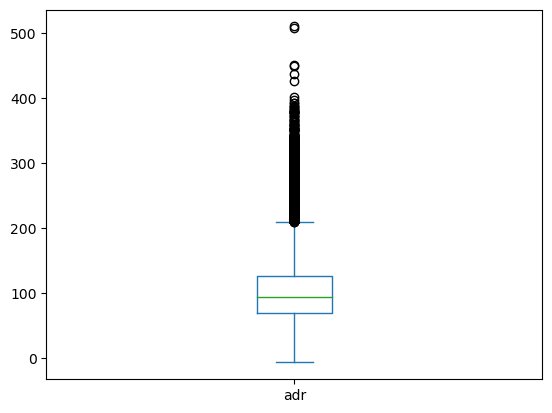

In [22]:
df['adr'].plot(kind="box")

# Data Analysis and Visualizations

In [23]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [24]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)

In [25]:
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

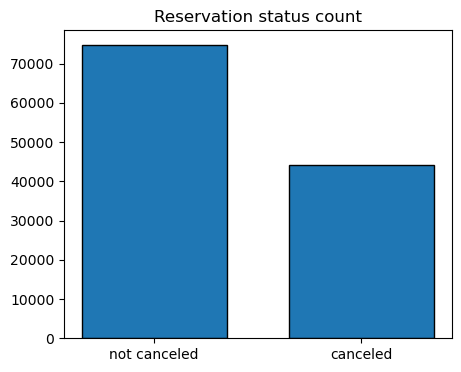

In [18]:
plt.figure(figsize = (5,4))
plt.title("Reservation status count")
plt.bar(["not canceled","canceled"],df["is_canceled"].value_counts(),edgecolor = "k" , width=0.7)
plt.show()

The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that 
there are still a significant number of reservations that have not been canceled. There are still 37% of cliens who canceled 
thier reservation, which has a signficant inpact on the hotels' earnings

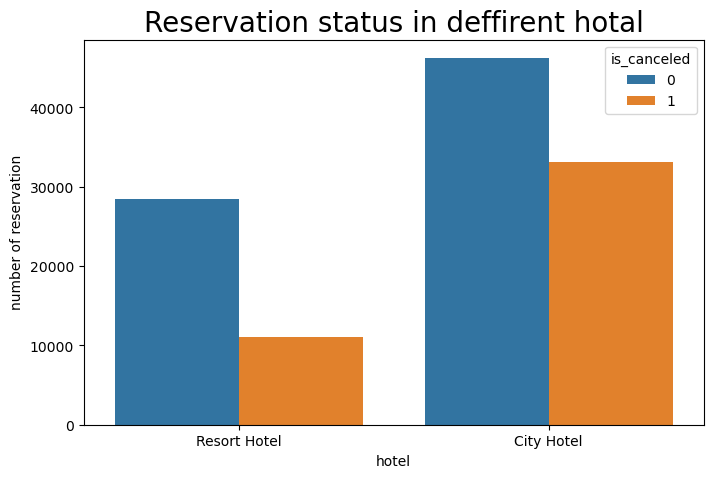

In [27]:
plt.figure(figsize = (8,5))
ax1=sns.countplot(x="hotel", hue="is_canceled", data=df)
legend_labels,_=ax1.get_legend_handles_labels()
plt.title("Reservation status in deffirent hotal",size=20)
plt.xlabel("hotel")
plt.ylabel("number of reservation")
plt.show()

In comparision to resort hotels, city hotels have more booking. It's possible that resort are more expensive than those in 
cities 

In [19]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [20]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [21]:
resort_hotele=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotele=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

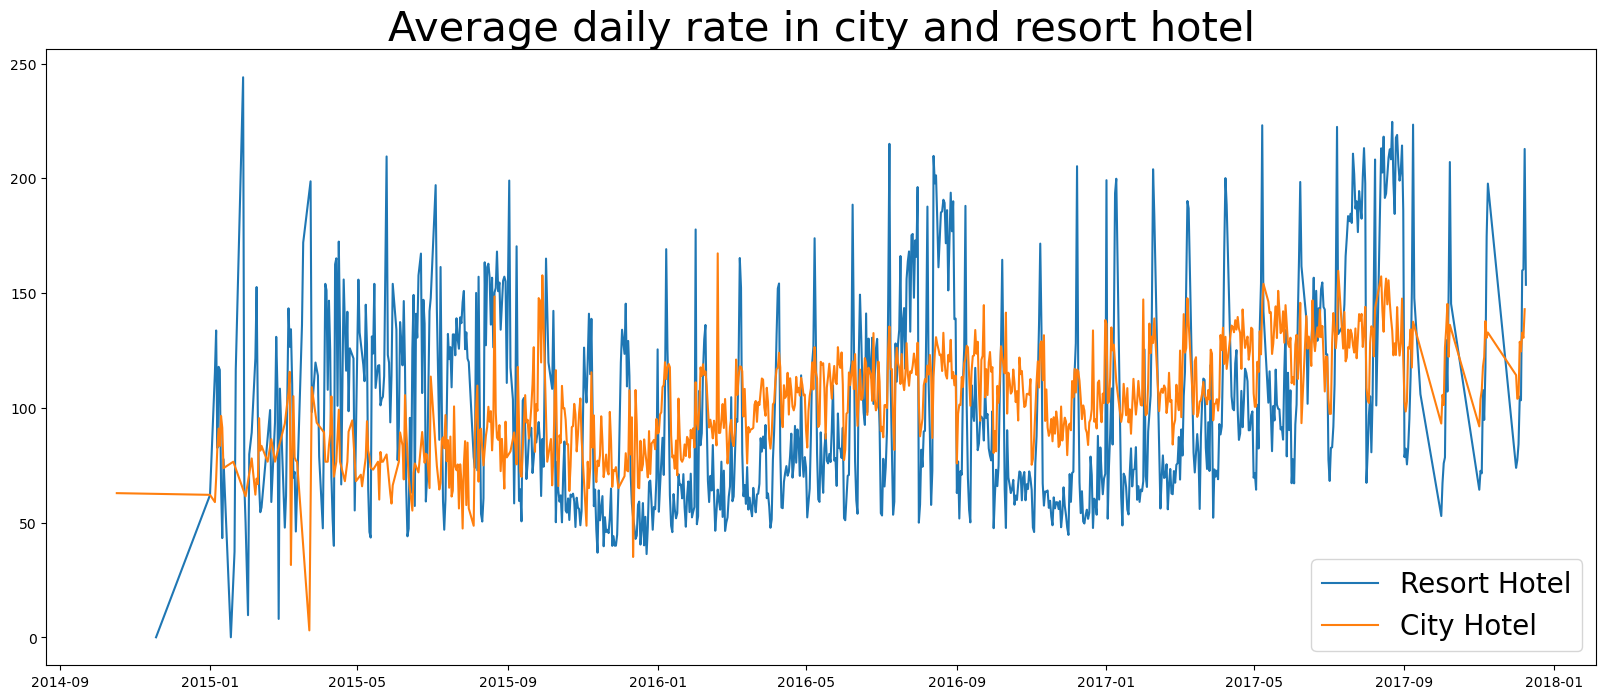

In [22]:
plt.figure(figsize = (20,8))
plt.title("Average daily rate in city and resort hotel",fontsize=30)
plt.plot(resort_hotele.index, resort_hotele["adr"], label="Resort Hotel")
plt.plot(city_hotele.index, city_hotele["adr"], label="City Hotel")
plt.legend(fontsize=20)
plt.show()

The line graph above show that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying the weekends and holidays may see a rise in resort hotel rate.

In [23]:
df["month"]=df["reservation_status_date"].dt.month

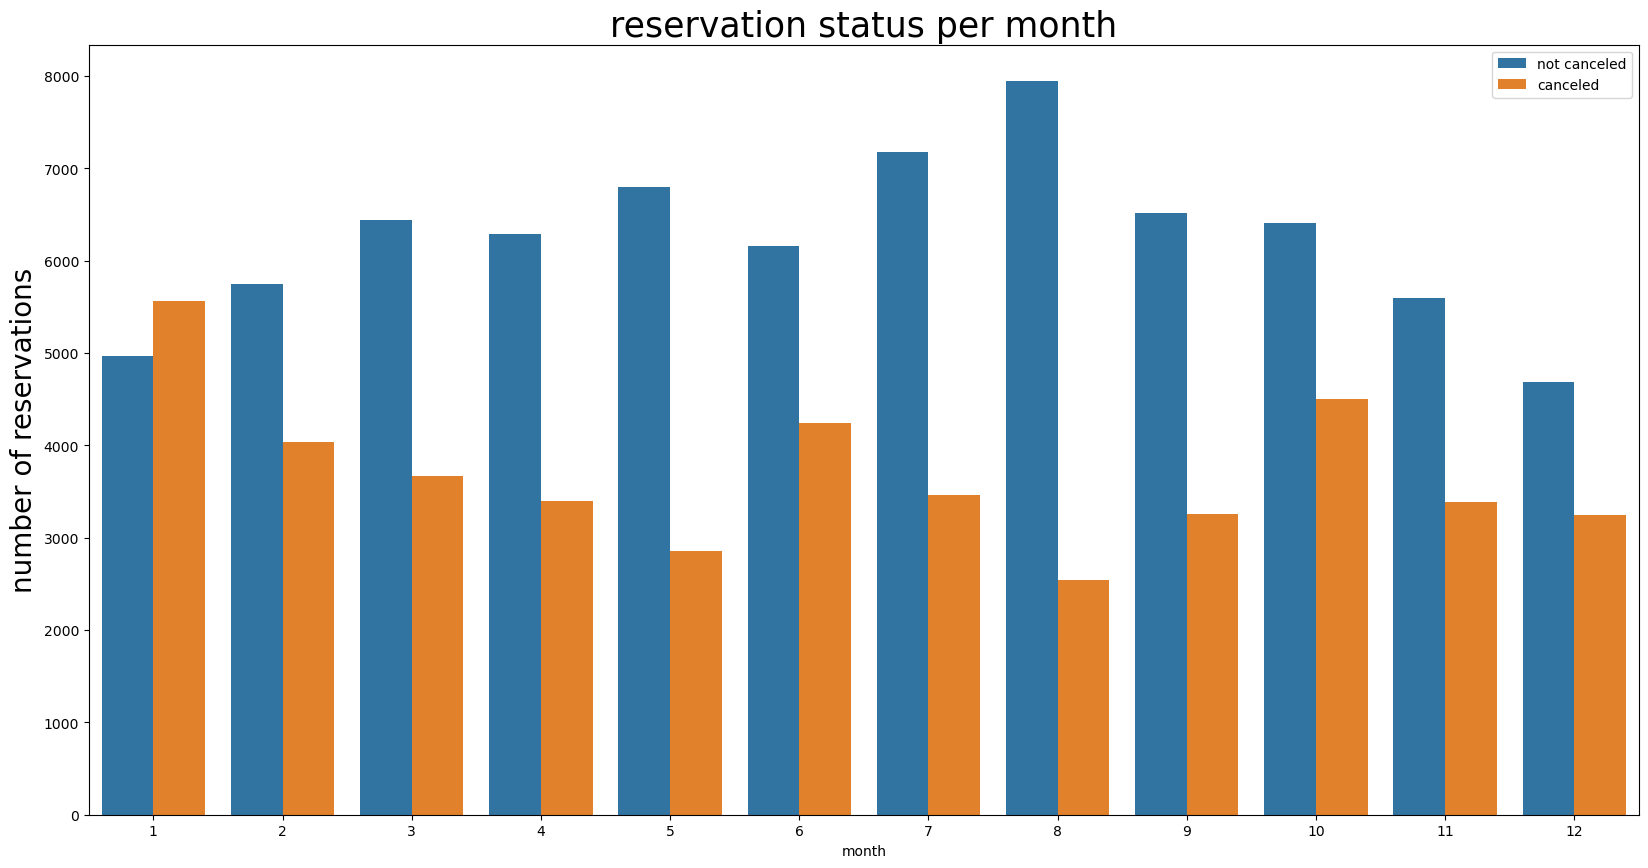

In [29]:
plt.figure(figsize=(20,10))
ax1=sns.countplot(x="month", hue="is_canceled",data=df)
plt.title("reservation status per month",size=25)
plt.ylabel("number of reservations",size=20)
plt.legend(["not canceled","canceled"])
plt.show()

We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to 
reservation status. As can be seen, both the number of confirmed reservations and the number of canceled reservation are largest in the moth of August. Whereas January is the moth with the most canceled reservations. 

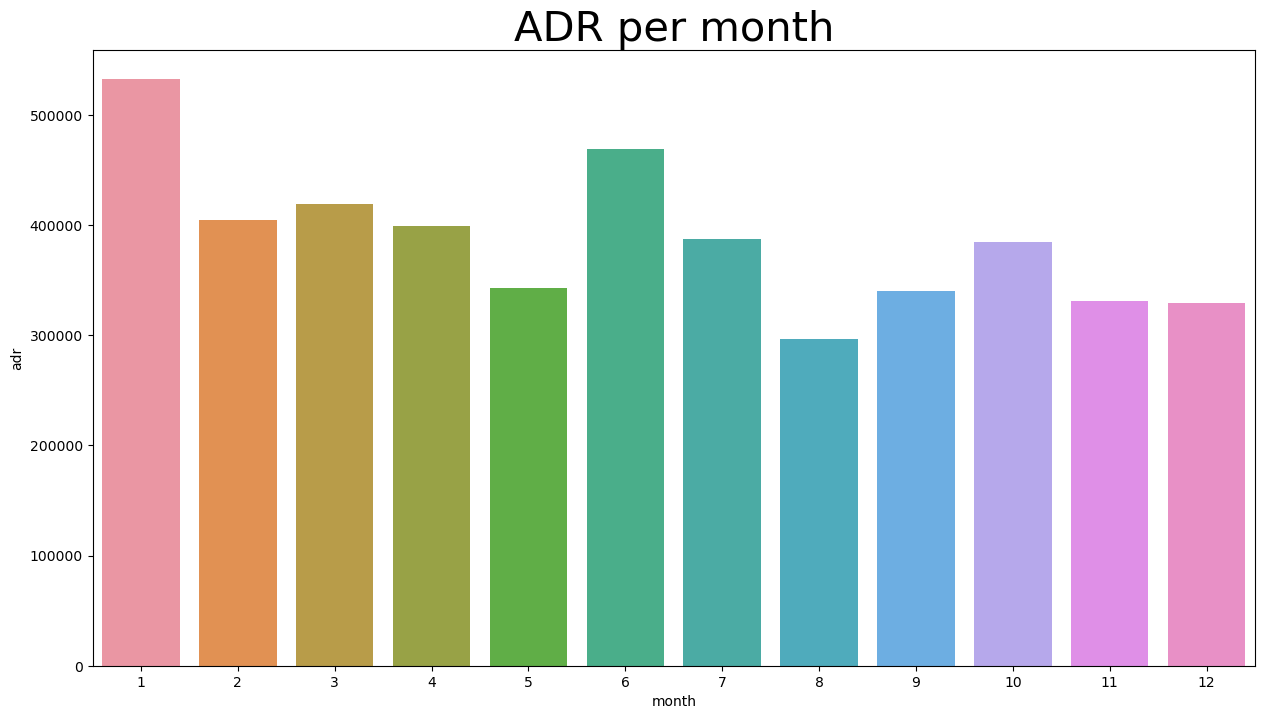

In [63]:
plt.figure(figsize=(15,8))
plt.title("ADR per month",fontsize=30)
sns.barplot(x="month", y="adr", data= df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())
plt.show()

This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are 
lowest. The cost of the accommodation is solely responsible for the cancellation.

Now let's see which country has the highest reservation canceled. The top country Portugal with the highest number of canceled.

In [34]:
cancelled_data = df[df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]

In [35]:
top_10_country

PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

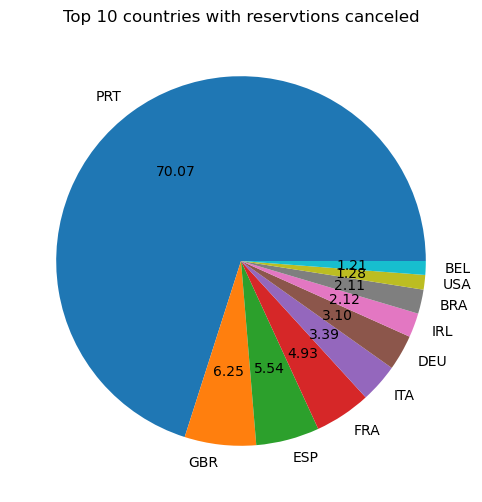

In [64]:
plt.figure(figsize=(8,6))
plt.title("Top 10 countries with reservtions canceled")
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.show()

Let's check the area from where guests are visiting the hotels and making reservation. Is it coming from Direct or Groups,
Online or Ofline Travel Agent? Around 46% of the clients come from online travel agencies, whereas 27% come from groups. Only 
4% client book hotels directly by visiting them and making reservtions.

In [43]:
df["market_segment"].value_counts(normalize=True)*100

Online TA        47.437299
Offline TA/TO    20.319938
Groups           16.657976
Direct           10.469478
Corporate         4.298643
Complementary     0.617336
Aviation          0.199331
Name: market_segment, dtype: float64

In [44]:
cancelled_data["market_segment"].value_counts(normalize=True)*100

Online TA        46.968496
Groups           27.397912
Offline TA/TO    18.748443
Direct            4.348515
Corporate         2.215025
Complementary     0.203837
Aviation          0.117772
Name: market_segment, dtype: float64

In [47]:
cancelled_df_adr = cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

In [54]:
not_cancelled_data = df[df["is_canceled"]==0]
not_cancelled_df_adr = not_cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

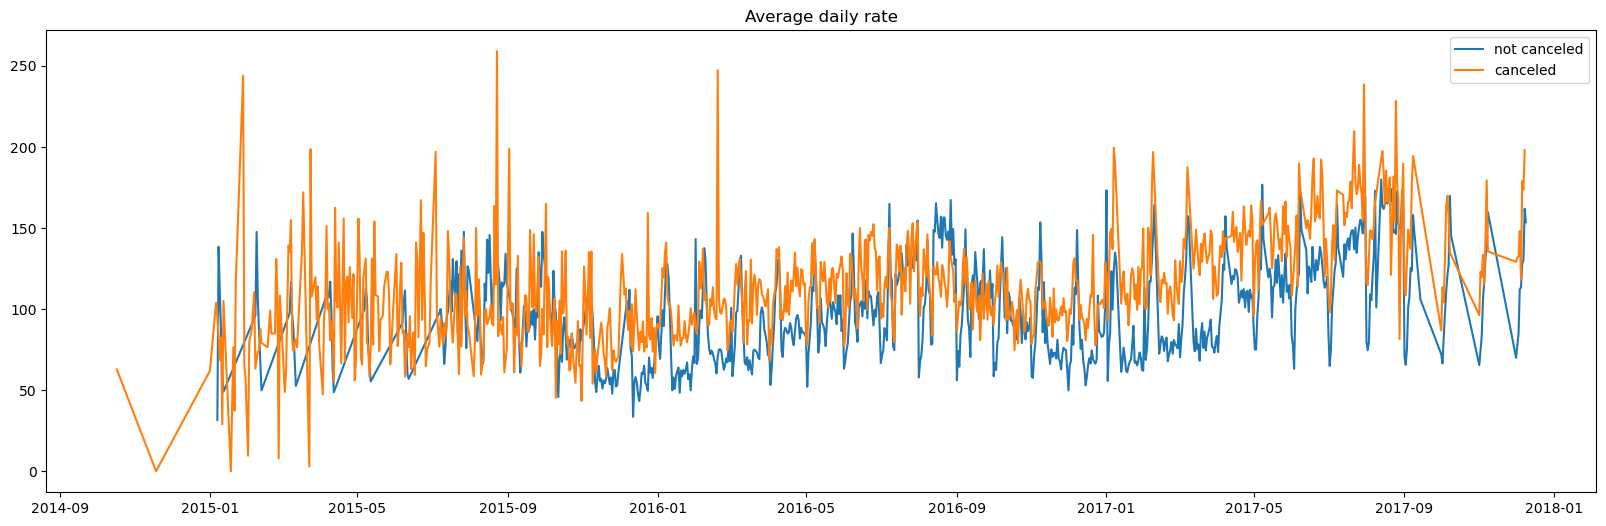

In [56]:
plt.figure(figsize=(20,6))
plt.title("Average daily rate")
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"], label = "not canceled")
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"], label = "canceled")
plt.legend()

In [58]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr["reservation_status_date"]>"2016") 
                                    & (cancelled_df_adr["reservation_status_date"]<"2017-09")]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"]>"2016") 
                                            & (not_cancelled_df_adr["reservation_status_date"]<"2017-09")]

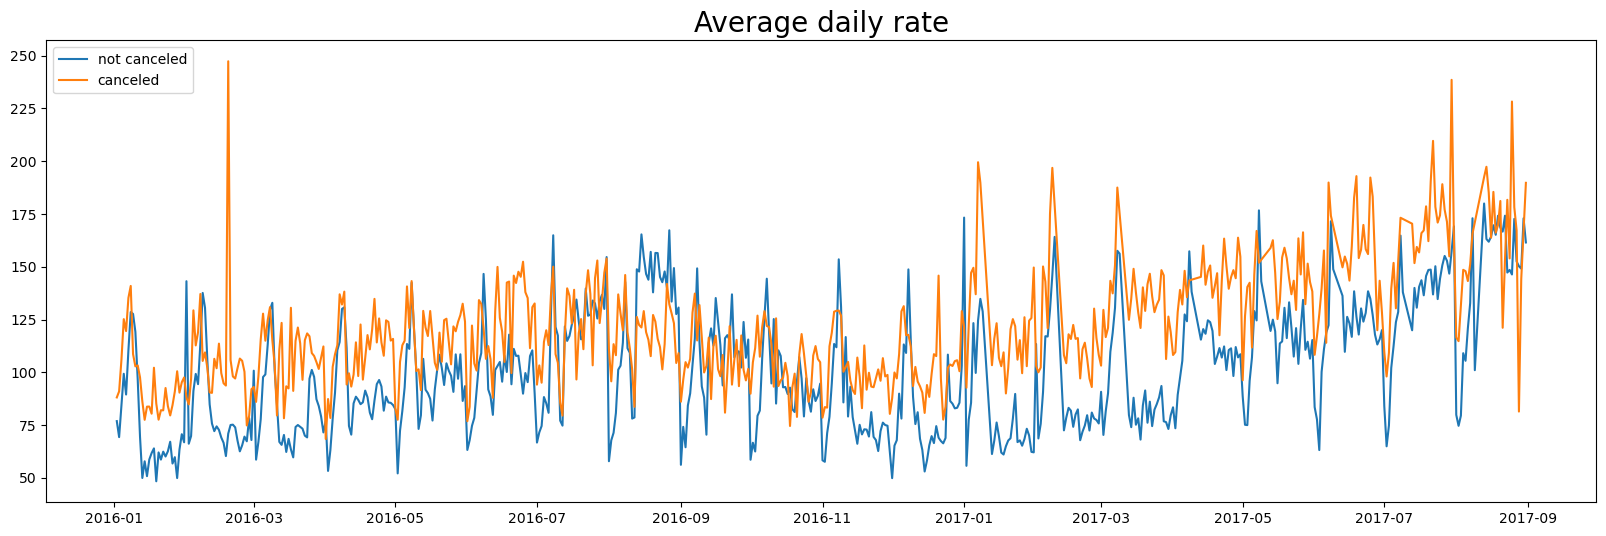

In [62]:
plt.figure(figsize=(20,6))
plt.title("Average daily rate", fontsize=20)
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"], label = "not canceled")
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"], label = "canceled")
plt.legend()
plt.show()

As seen in the graph, reservation are canceled when the average daily rate is higher that when it is not canceled. It crearly 
proves all the above analysis, that the higher price leads to higher cancellations.

# Suggestions

1:- Cancellation rate rise as the price does. In order to prevent cancellation of reservation, hotels could work on their 
    strategies and try to lower the rate for specific hotels based on locations. they can also provide some discounts to the 
    consumers
    
2:- As the ratio of the cancellation and not cancellation of the resort hotol is higher in the resort hotel than the city hotels
    So the hotels should provide a reasonable discount on the room prices on weekends or no holidays.
    
3:- In the month of Jnaury, hotels can start campaigns or marketing with a reasonable amount to increase thier revenue as the
    cancellation is the highest in this moth
    
4:- They can also increase the quality of thier hotels and thier services mainly in Portugal to reduce the cancellation rate.